<a href="https://colab.research.google.com/github/RiceWater/New-Thesis-KFold-2CLS/blob/Only-Vehicle/Kaggle_2CLS_Only_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intialize Prerequisite

In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [2]:
!pip uninstall jax -y

Found existing installation: jax 0.4.26
Uninstalling jax-0.4.26:
  Successfully uninstalled jax-0.4.26


In [3]:
!pip install tensorflow==2.15.0

In [4]:
!python --version

Python 3.10.12


In [5]:
!pip install image_to_numpy==1.0.0

  Preparing metadata (setup.py) ... done
  Created wheel for image_to_numpy: filename=image_to_numpy-1.0.0-py3-none-any.whl size=3456 sha256=377a25bb393994b26c855479e634ebeba5d942a75043d32fe852882045f125f4
  Stored in directory: /root/.cache/pip/wheels/4c/e5/7e/f10f47129bb75abc8cd52a8abbff926b4a6121990f926cfe6d
Successfully built image_to_numpy


In [6]:
!pip install neptune==1.9.1 neptune-tensorflow-keras==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.5/495.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.6 MB/s eta 0:00:00
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67672 sha256=12739085ef4676ac08f866a92ea74494dec79a9d3277b674d64e00e2670aa4bc
  Stored in directory: /root/.cache/pip/wheels/42/35/4a/44e

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import tqdm
import os
import cv2
import imghdr
import image_to_numpy
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import itertools
from numpy.random import default_rng

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast, RandomBrightness, Rescaling, Resizing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.metrics import F1Score, Precision, Recall, CategoricalAccuracy
from tensorboard.plugins.hparams import api as hp
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold

from time import perf_counter
import math

import neptune
from neptune.integrations.tensorflow_keras import NeptuneCallback

In [9]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Chua_Thesis/4-600-Dataset'):
    print(os.path.join(dirname))

os.environ['NEPTUNE_API_TOKEN'] = "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiM2YzNGEwOC1iNmYyLTQ3YTEtYTljNi0xOWNmYWE0ZjZjOTMifQ=="

/content/drive/MyDrive/Chua_Thesis/4-600-Dataset
/content/drive/MyDrive/Chua_Thesis/4-600-Dataset/Road
/content/drive/MyDrive/Chua_Thesis/4-600-Dataset/Vehicle
/content/drive/MyDrive/Chua_Thesis/4-600-Dataset/Plant
/content/drive/MyDrive/Chua_Thesis/4-600-Dataset/Building


## Prepare Dataset

In [10]:
with tf.device('/gpu:0'):
    labels = ['Vehicle', 'Road']
    X_train = []
    y_train = []
    y_label_idx = []
    image_size = 256
    for i in labels:
        folderPath = os.path.join('/content/drive/MyDrive/Chua_Thesis/4-600-Dataset', i)
        for j in os.listdir(folderPath):
            img = image_to_numpy.load_image_file(os.path.join(folderPath,j))
            img = cv2.resize(img,(image_size, image_size))
            X_train.append(img)
            y_label_idx.append(labels.index(i))

In [11]:
X_train = np.array(X_train)
y_label_idx = np.array(y_label_idx)

X_train_scaled = X_train.astype(np.float32) / 255.0

In [12]:
# seed ensures that the generation are the same from local and kaggle
rng = default_rng(seed=1)

vehicles_test_idx = rng.choice(np.arange(0,600), size=120, replace=False)
roads_test_idx = rng.choice(np.arange(600,1200), size=120, replace=False)
total_test_idx = np.concatenate((vehicles_test_idx, roads_test_idx), axis=None)
print(total_test_idx[:20])

[273 397 467 471 105 584 208 456  32 573 462 540 261 134 460 229 494 293
 412 515]


In [13]:
def train_test_X(X_train_scaled):
    test_x = X_train_scaled[total_test_idx]
    train_x = np.delete(X_train_scaled, total_test_idx, axis=0)
    return train_x, test_x

def train_test_y(y_label_idx):
    test_y = y_label_idx[total_test_idx]
    train_y = np.delete(y_label_idx, total_test_idx, axis=0)
    return train_y, test_y

In [14]:
train_x, holdout_x = train_test_X(X_train_scaled)
train_y, holdout_y = train_test_y(y_label_idx)

## Create Functions for KFold

In [15]:
def make_model(params):
    model = Sequential()
    model.add(RandomFlip(mode='horizontal', seed=1, input_shape=(256,256,3)))
    model.add(RandomRotation(factor=0.2, seed=1))

    model.add(Conv2D(input_shape=(256,256,3), filters=16, kernel_size=(3,3), padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(MaxPooling2D())

    model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(MaxPooling2D())

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(MaxPooling2D())

    model.add(Flatten())
    model.add(Dropout(0.2, seed=1))
    model.add(Dense(units=128,activation="relu"))
    model.add(Dense(units=64,activation="relu"))

    model.add(Dense(units=2, activation="softmax"))


    optimizer = tf.keras.optimizers.Adam(
        learning_rate=params["lr"],
    )

    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
def create_callbacks(counter):
    neptune_cbk = NeptuneCallback(run=run, base_namespace="training")

    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path + str(counter),
                                                                 monitor='val_loss',
                                                                 mode='auto',
                                                                 save_best_only=True,
                                                                 verbose=1)
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=15,
                                                  )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                         factor=0.6,
                                                         patience=5,
                                                         min_delta=0.001,
                                                         mode='auto',
                                                         verbose=1)
    return [neptune_cbk, reduce_lr, cp_callback, es_callback]

In [17]:
def plot_loss(hist):
    fig = plt.figure(figsize=(3,2))
    plt.plot(hist.history['loss'], color='teal', label='loss')
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
    plt.suptitle('Loss')
    plt.legend(loc='upper right')
    plt.show()
    return fig

def plot_acc(hist):
    fig = plt.figure(figsize=(3,2))
    plt.plot(hist.history['accuracy'], color='teal', label='acc')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_acc')
    plt.suptitle('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
    return fig

def avg_rate(metric_list):
    return sum(metric_list) / len(metric_list)

## KFOLD

In [18]:
!mkdir MODEL

In [19]:
model_name= '2CLS-OV-4_0_1'
checkpoint_path = f'/content/MODEL/{model_name}/FOLD-'
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=1)
project_name='New-Thesis/Kaggle-2Cls-Only-Vehicle'

[neptune] [info   ] Neptune initialized. Open in the app: offline/9ec45233-ccce-469a-a7f5-9421c6f2c989
Epoch 1/25
101/105 [===========================>..] - ETA: 0s - loss: 2.1711 - accuracy: 0.8676
Epoch 1: val_loss improved from inf to 0.71940, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-0
105/105 [==============================] - 6s 36ms/step - loss: 2.1496 - accuracy: 0.8679 - val_loss: 0.7194 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/25
102/105 [============================>.] - ETA: 0s - loss: 0.8606 - accuracy: 0.9118
Epoch 2: val_loss did not improve from 0.71940
105/105 [==============================] - 1s 11ms/step - loss: 0.8709 - accuracy: 0.9095 - val_loss: 3.1228 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 3/25
105/105 [==============================] - ETA: 0s - loss: 0.3265 - accuracy: 0.9464
Epoch 3: val_loss did not improve from 0.71940
105/105 [==============================] - 1s 11ms/step - loss: 0.3265 - accuracy: 0.9464 - val_loss: 0.8036 - val_accuracy: 

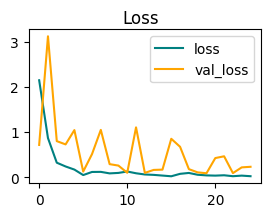

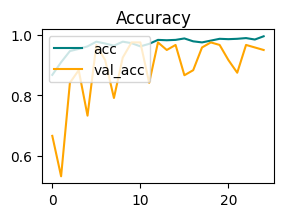

Fold Training Time: 0 hour(s) and 0 mins
Precision: 96.66666388511658  -  Recall: 96.66666388511658
Accuracy: 96.66666388511658
F1Score-V: 96.72130584716797
F1Score-R: 96.61016845703125
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/927fa87c-bd63-45d2-8edb-563c09514b54
Epoch 1/25
102/105 [============================>.] - ETA: 0s - loss: 1.5538 - accuracy: 0.8199
Epoch 1: val_loss improved from inf to 1.39456, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-1
105/105 [==============================] - 6s 31ms/step - loss: 1.5284 - accuracy: 0.8214 - val_loss: 1.3946 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
104/105 [============================>.] - ETA: 0s - loss: 0.5198 - accuracy: 0.9111
Epoch 2: val_loss improved from 1.39456 to 0.26872, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-1
105/105 [==============================] - 3s 30ms/step - loss: 0.514

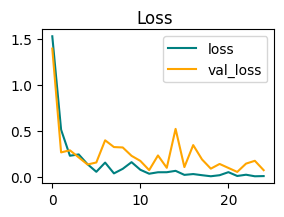

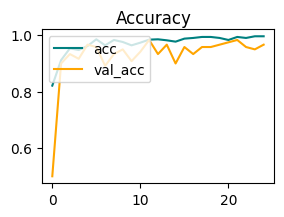

Fold Training Time: 0 hour(s) and 0 mins
Precision: 98.33333492279053  -  Recall: 98.33333492279053
Accuracy: 98.33333492279053
F1Score-V: 98.33333587646484
F1Score-R: 98.33333587646484
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/9fb411fa-9918-4bb2-9e8c-43cf859ca340
Epoch 1/25
101/105 [===========================>..] - ETA: 0s - loss: 2.8411 - accuracy: 0.7970
Epoch 1: val_loss improved from inf to 2.21643, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-2
105/105 [==============================] - 6s 32ms/step - loss: 2.7719 - accuracy: 0.8024 - val_loss: 2.2164 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
103/105 [============================>.] - ETA: 0s - loss: 0.3098 - accuracy: 0.9357
Epoch 2: val_loss improved from 2.21643 to 0.70373, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-2
105/105 [==============================] - 4s 34ms/step - loss: 0.306

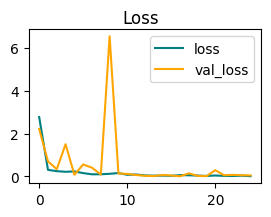

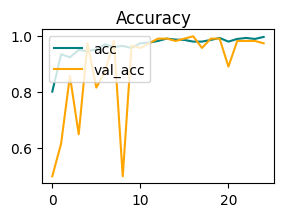

Fold Training Time: 0 hour(s) and 0 mins
Precision: 100.0  -  Recall: 100.0
Accuracy: 100.0
F1Score-V: 100.0
F1Score-R: 100.0
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/e8172ac4-46f3-4082-a7f7-290e79bddc2b
Epoch 1/25
102/105 [============================>.] - ETA: 0s - loss: 2.1384 - accuracy: 0.8284
Epoch 1: val_loss improved from inf to 1.89246, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-3
105/105 [==============================] - 6s 31ms/step - loss: 2.0945 - accuracy: 0.8298 - val_loss: 1.8925 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
103/105 [============================>.] - ETA: 0s - loss: 0.7289 - accuracy: 0.8968
Epoch 2: val_loss did not improve from 1.89246
105/105 [==============================] - 1s 10ms/step - loss: 0.7347 - accuracy: 0.8976 - val_loss: 2.6225 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 3/25
102/105 [=====================

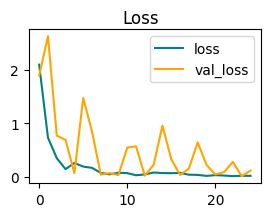

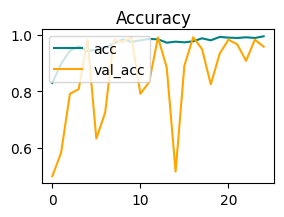

Fold Training Time: 0 hour(s) and 0 mins
Precision: 98.33333492279053  -  Recall: 98.33333492279053
Accuracy: 98.33333492279053
F1Score-V: 98.36064910888672
F1Score-R: 98.30508422851562
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/1765e5a8-f7c4-4048-bf48-d19c724226b8
Epoch 1/25
100/105 [===========================>..] - ETA: 0s - loss: 1.7271 - accuracy: 0.8575
Epoch 1: val_loss improved from inf to 0.91181, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-4
105/105 [==============================] - 6s 32ms/step - loss: 1.6751 - accuracy: 0.8595 - val_loss: 0.9118 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 2/25
101/105 [===========================>..] - ETA: 0s - loss: 0.3332 - accuracy: 0.9208
Epoch 2: val_loss improved from 0.91181 to 0.20600, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-4
105/105 [==============================] - 3s 30ms/step - loss: 0.329

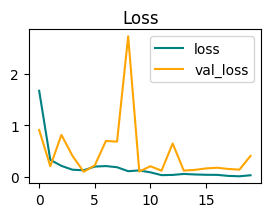

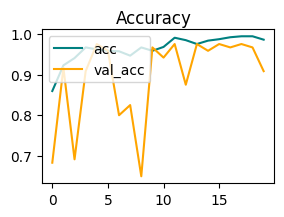

Fold Training Time: 0 hour(s) and 0 mins
Precision: 97.50000238418579  -  Recall: 97.50000238418579
Accuracy: 97.50000238418579
F1Score-V: 97.47898864746094
F1Score-R: 97.52066040039062
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/0bf597f5-72f4-4994-b0e5-037f84b73130
Epoch 1/25
104/105 [============================>.] - ETA: 0s - loss: 1.4090 - accuracy: 0.8594
Epoch 1: val_loss improved from inf to 0.65176, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-5
105/105 [==============================] - 6s 32ms/step - loss: 1.3955 - accuracy: 0.8607 - val_loss: 0.6518 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 2/25
105/105 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.9369
Epoch 2: val_loss improved from 0.65176 to 0.21320, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-5
105/105 [==============================] - 4s 34ms/step - loss: 0.498

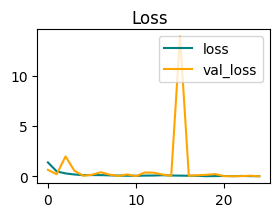

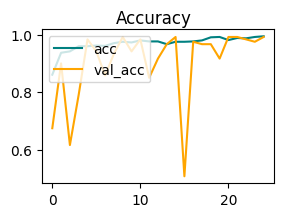

Fold Training Time: 0 hour(s) and 0 mins
Precision: 99.16666746139526  -  Recall: 99.16666746139526
Accuracy: 99.16666746139526
F1Score-V: 99.15966033935547
F1Score-R: 99.17355346679688
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/0c55db12-3b39-48c3-84ee-88b7dd267316
Epoch 1/25
105/105 [==============================] - ETA: 0s - loss: 1.7659 - accuracy: 0.8417
Epoch 1: val_loss improved from inf to 3.94531, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-6
105/105 [==============================] - 6s 32ms/step - loss: 1.7659 - accuracy: 0.8417 - val_loss: 3.9453 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
103/105 [============================>.] - ETA: 0s - loss: 0.5639 - accuracy: 0.9308
Epoch 2: val_loss improved from 3.94531 to 2.72194, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-6
105/105 [==============================] - 3s 30ms/step - loss: 0.553

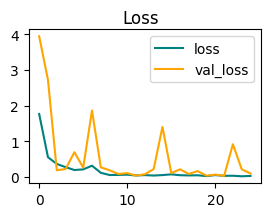

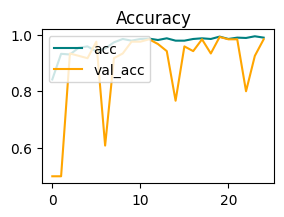

Fold Training Time: 0 hour(s) and 0 mins
Precision: 98.33333492279053  -  Recall: 98.33333492279053
Accuracy: 98.33333492279053
F1Score-V: 98.30508422851562
F1Score-R: 98.36064910888672
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Neptune initialized. Open in the app: offline/49f297c6-36da-425a-aea6-029b4e3aadcb
Epoch 1/25
104/105 [============================>.] - ETA: 0s - loss: 1.6322 - accuracy: 0.8305
Epoch 1: val_loss improved from inf to 2.06586, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-7
105/105 [==============================] - 6s 32ms/step - loss: 1.6167 - accuracy: 0.8321 - val_loss: 2.0659 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/25
102/105 [============================>.] - ETA: 0s - loss: 0.3688 - accuracy: 0.9400
Epoch 2: val_loss improved from 2.06586 to 1.02224, saving model to /content/MODEL/2CLS-OV-4_0_1/FOLD-7
105/105 [==============================] - 4s 35ms/step - loss: 0.370

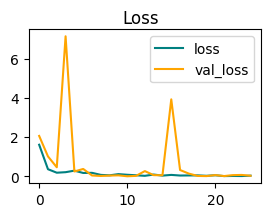

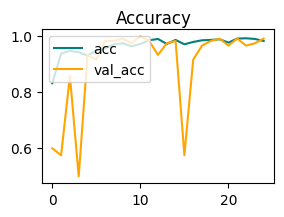

Fold Training Time: 0 hour(s) and 0 mins
Precision: 100.0  -  Recall: 100.0
Accuracy: 100.0
F1Score-V: 100.0
F1Score-R: 100.0
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
Total Training Time: 0 hour(s) and 6 mins


In [25]:
params = {
    "lr": 0.001,
    "epochs": 25,
    "batch_size": 8}

precisions = []
recalls = []
accuracies = []
f1_vcl = []
f1_road = []

with tf.device('/gpu:0'):
    counter = 0
    start = perf_counter()
    for train, test in kfold.split(train_x, train_y):
        start_fold = perf_counter()

        run = neptune.init_run(
            name= f"{model_name}-FOLD_{counter}",
            project=project_name,
            mode="offline",     # To prevent issue when internet sucks. Just manually sync it
            )  # your credentials

        run["parameters"] = params


        model = make_model(params)
        cat_y = tf.keras.utils.to_categorical(train_y)

        train_dataset = tf.data.Dataset.from_tensor_slices((train_x[train], cat_y[train]))
        train_fold = train_dataset.shuffle(buffer_size=train_dataset.cardinality(), seed=1).batch(params['batch_size'])

        test_dataset = tf.data.Dataset.from_tensor_slices((train_x[test], cat_y[test]))
        test_fold = test_dataset.shuffle(buffer_size=test_dataset.cardinality(), seed=1).batch(params['batch_size'])

        hist = model.fit(train_fold,
                         validation_data=test_fold,
                         batch_size=params['batch_size'],
                         epochs=params['epochs'],
                         verbose=1,
                         callbacks=create_callbacks(counter))
        end_fold = perf_counter()

        # PLOTTING ==================================================
        run["fig-train_loss"].upload(plot_loss(hist))
        run["fig-train_acc"].upload(plot_acc(hist))

        # EVALUATING ==================================================
        model = tf.keras.models.load_model(checkpoint_path + str(counter))

        pre = Precision()
        rec = Recall()
        c_acc = CategoricalAccuracy()
        f1_score = F1Score()
        for batch in test_fold.as_numpy_iterator():
            X, y = batch
            yhat = model.predict(X, verbose=0)
            pre.update_state(y, yhat)
            rec.update_state(y, yhat)
            c_acc.update_state(y, yhat)
            f1_score.update_state(y, yhat)


        precisions.append(pre.result().numpy() * 100)
        recalls.append(rec.result().numpy() * 100)
        accuracies.append(c_acc.result().numpy() * 100)
        f1_s = f1_score.result().numpy() * 100

        f1_vcl.append(f1_s[0])
        f1_road.append(f1_s[1])

        run["eval/ACC/"] = accuracies[counter]
        run["eval/REC/"] = recalls[counter]
        run["eval/PRE/"] = precisions[counter]
        run["eval/F1-V"] = f1_vcl[counter]
        run["eval/F1-R"] = f1_road[counter]

        # SAVE MODEL TO NEPTUNE AI =======================================
        model_save_path = f'{checkpoint_path}{counter}/{model_name}-FOLD-{counter}.keras'
        model.save(model_save_path)
        run['checkpoint/model'].upload(model_save_path)

        # PRINTING RESULTS ===========================================
        print(f'Fold Training Time: {math.floor((end_fold-start_fold)/3600) } hour(s) and {math.floor((end_fold-start_fold)/60)%60} mins')
        print(f'Precision: {precisions[counter]}  -  Recall: {recalls[counter]}')
        print(f'Accuracy: {accuracies[counter]}')
        print(f'F1Score-V: {f1_vcl[counter]}')
        print(f'F1Score-R: {f1_road[counter]}')

        run.stop()

        counter += 1

    end = perf_counter()
    print(f'Total Training Time: {math.floor((end-start)/3600) } hour(s) and {math.floor((end-start)/60)%60} mins')

In [26]:
print(f"""
Avg Accuracy: {avg_rate(accuracies)}
Avg Precision: {avg_rate(precisions)}
Avg Recall: {avg_rate(recalls)}
Avg F1-Score-B: {avg_rate(f1_vcl)}
Avg F1-Score-R: {avg_rate(f1_road)}
""")


Avg Accuracy: 98.54166731238365
Avg Precision: 98.54166731238365
Avg Recall: 98.54166731238365
Avg F1-Score-B: 98.54487800598145
Avg F1-Score-R: 98.53793144226074



In [27]:
run = neptune.init_run(
            name= f"{model_name}-AVG",
            project=project_name,
            mode="offline",     # To prevent issue when internet sucks. Just manually sync it
            )

run["eval/PRE/"] = avg_rate(precisions)
run["eval/REC/"] = avg_rate(recalls)
run["eval/ACC/"] = avg_rate(accuracies)
run["eval/F1-V"] = avg_rate(f1_vcl)
run["eval/F1-R"] = avg_rate(f1_road)

run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: offline/838bf60d-ac0c-43e5-95c2-b9c56018dee3
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!


In [28]:
!neptune sync -p 'New-Thesis/Kaggle-2Cls-Only-Vehicle' --offline-only

Offline container 9bd83038-284d-43a0-b79a-ccde417a1994 registered as New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-2
Synchronising New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-2
Deleted: /content/.neptune/async/run__9bd83038-284d-43a0-b79a-ccde417a1994__27314__3jif5n3t
Synchronization of run New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-2 completed.
Offline container 9bd83042-e83d-48a3-9faf-9685a304088e registered as New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-3
Synchronising New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-3
Deleted: /content/.neptune/async/run__9bd83042-e83d-48a3-9faf-9685a304088e__27314__wss7o63b
Synchronization of run New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-3 completed.
Offline container 9bd8304b-ca0f-45f5-b3ac-abe95e9596ea registered as New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-4
Synchronising New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-4
Deleted: /content/.neptune/async/run__9bd8304b-ca0f-45f5-b3ac-abe95e9596ea__27314__52xadvrp
Synchronization of run New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV

In [29]:
!neptune clear

In [30]:
!rm -r "/content/MODEL/2CLS-OV-4_0_1"

## TRAIN Final Model

### Create a different callback function

In [20]:
def create_callbacks_final():
    neptune_cbk = NeptuneCallback(run=run, base_namespace="training")

    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=final_checkpoint_path,
                                                                 monitor='val_loss',
                                                                 mode='auto',
                                                                 save_best_only=True,
                                                                 verbose=1)
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=15,
                                                  )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                         factor=0.6,
                                                         patience=5,
                                                         min_delta=0.001,
                                                         mode='auto',
                                                         verbose=1)
    return [neptune_cbk, reduce_lr, cp_callback, es_callback]

In [21]:
final_model = f"Final-{model_name}"
final_checkpoint_path = f'./checkpoints/{final_model}/'
params = {
    "lr": 0.001,
    "epochs": 55,
    "batch_size": 8}

In [22]:
y_train = tf.keras.utils.to_categorical(train_y)
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, y_train))
compiled_train_dataset = train_dataset.shuffle(buffer_size=train_dataset.cardinality(), seed=1).batch(params['batch_size'])

y_test = tf.keras.utils.to_categorical(holdout_y)
test_dataset = tf.data.Dataset.from_tensor_slices((holdout_x, y_test))
holdout_test_dataset = test_dataset.shuffle(buffer_size=test_dataset.cardinality(), seed=1).batch(params['batch_size'])


### Run Training

In [23]:
run = neptune.init_run(
        name= f"{final_model}",
        project=project_name,
        mode="offline"     # To prevent issue when internet sucks. Just manually sync it
    )  # your credentials

run["parameters"] = params
model = make_model(params)

[neptune] [info   ] Neptune initialized. Open in the app: offline/9f1123f2-98d0-4ff5-b04b-6806ac7958b1


[neptune] [warning] NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/


In [24]:
start = perf_counter()
hist = model.fit(compiled_train_dataset,
                 validation_data=holdout_test_dataset,
                 batch_size=params['batch_size'],
                 epochs=params['epochs'],
                 verbose=1,
                 callbacks=create_callbacks_final())
end = perf_counter()

Epoch 1/55
120/120 [==============================] - ETA: 0s - loss: 1.5476 - accuracy: 0.8438
Epoch 1: val_loss improved from inf to 3.24086, saving model to ./checkpoints/Final-2CLS-OV-4_0_1/
120/120 [==============================] - 11s 35ms/step - loss: 1.5476 - accuracy: 0.8438 - val_loss: 3.2409 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 2/55
115/120 [===========================>..] - ETA: 0s - loss: 0.2176 - accuracy: 0.9522
Epoch 2: val_loss improved from 3.24086 to 0.55696, saving model to ./checkpoints/Final-2CLS-OV-4_0_1/
120/120 [==============================] - 4s 29ms/step - loss: 0.2218 - accuracy: 0.9510 - val_loss: 0.5570 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/55
115/120 [===========================>..] - ETA: 0s - loss: 0.2835 - accuracy: 0.9326
Epoch 3: val_loss improved from 0.55696 to 0.49011, saving model to ./checkpoints/Final-2CLS-OV-4_0_1/
120/120 [==============================] - 3s 28ms/step - loss: 0.2912 - accuracy: 0.9312 - val_loss: 0.4901 - val_a

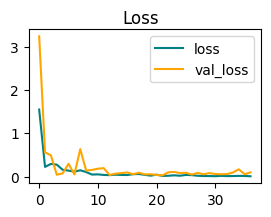

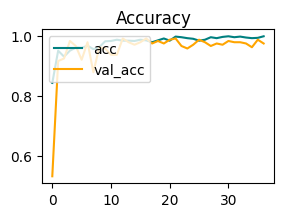

In [25]:
run["fig-train_loss"].upload(plot_loss(hist))
run["fig-train_acc"].upload(plot_acc(hist))

In [26]:
# EVALUATING ==================================================
model = tf.keras.models.load_model(final_checkpoint_path)

pre = Precision()
rec = Recall()
c_acc = CategoricalAccuracy()
f1_score = F1Score()
for batch in holdout_test_dataset.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X, verbose=0)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    c_acc.update_state(y, yhat)
    f1_score.update_state(y, yhat)

precision = pre.result().numpy() * 100
recall = rec.result().numpy() * 100
accuracy = c_acc.result().numpy() * 100
f1_s = f1_score.result().numpy() * 100

f1_V = f1_s[0]
f1_R = f1_s[1]

run["eval/ACC/"] = accuracy
run["eval/REC/"] = recall
run["eval/PRE/"] = precision
run["eval/F1-V"] = f1_V
run["eval/F1-R"] = f1_R

# SAVE MODEL TO NEPTUNE AI =======================================
model_save_path = f'./{final_model}.keras'
model.save(model_save_path)
run['checkpoint/model'].upload(model_save_path)

# PRINTING RESULTS ===========================================
print(f'Fold Training Time: {math.floor((end-start)/3600) } hour(s) and {math.floor((end-start)/60)%60} mins')
print(f'Precision: {precision}  -  Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1Score-V: {f1_V}')
print(f'F1Score-R: {f1_R}')

Fold Training Time: 0 hour(s) and 1 mins
Precision: 99.16666746139526  -  Recall: 99.16666746139526
Accuracy: 99.16666746139526
F1Score-V: 99.15966033935547
F1Score-R: 99.17355346679688


In [27]:
run.stop()

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!


In [28]:
!neptune sync -p 'New-Thesis/Kaggle-2Cls-Only-Vehicle' --offline-only

Offline container 9bd85b29-3b7c-47d3-b32f-a364adbf0f90 registered as New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-11
Synchronising New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-11
Deleted: /content/.neptune/async/run__9bd85b29-3b7c-47d3-b32f-a364adbf0f90__8755__uthka0j7
Synchronization of run New-Thesis/Kaggle-2Cls-Only-Vehicle/K2OV-11 completed.


### Download Model Weights

In [29]:
model.save_weights(f"./{final_model}/weights/{final_model}")

In [30]:
!zip -r Final-OV-4_0_1.zip "./Final-2CLS-OV-4_0_1"

  adding: Final-2CLS-OV-4_0_1/ (stored 0%)
  adding: Final-2CLS-OV-4_0_1/weights/ (stored 0%)
  adding: Final-2CLS-OV-4_0_1/weights/Final-2CLS-OV-4_0_1.index (deflated 62%)
  adding: Final-2CLS-OV-4_0_1/weights/checkpoint (deflated 40%)
  adding: Final-2CLS-OV-4_0_1/weights/Final-2CLS-OV-4_0_1.data-00000-of-00001 (deflated 7%)
